# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [253]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [254]:
# Checking the number of mice.
print(f"Number of unique mice: {merged_data['Mouse ID'].nunique()}")

Number of unique mice: 249


In [255]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
print(f"Duplicate mice ID and time points: {duplicated}")

Duplicate mice ID and time points:      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [256]:
clean_df = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'])

In [257]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [258]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.duplicated(['Mouse ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [259]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = merged_data.drop_duplicates(['Mouse ID'])
clean_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [260]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data.duplicated(['Mouse ID']).sum()

0

## Summary Statistics

In [261]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summy_of_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summy_of_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [262]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

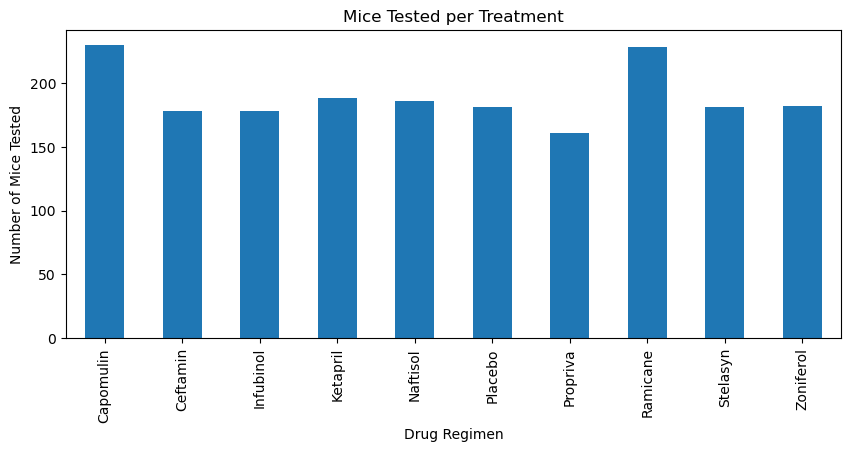

<Figure size 800x800 with 0 Axes>

In [263]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
datapoint_plot = merged_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
datapoint_plot

datapoint_plot.plot(kind="bar", figsize=(10,4))

plt.title("Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Display plot
plt.show()
plt.tight_layout()


<function matplotlib.pyplot.legend(*args, **kwargs)>

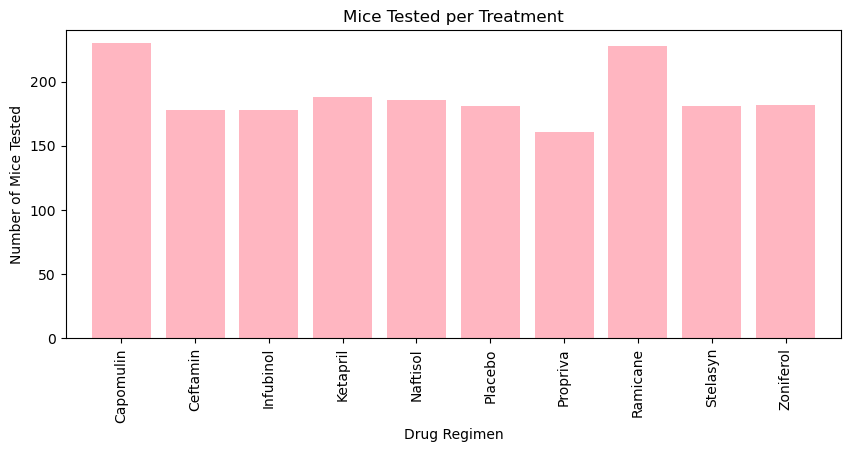

In [264]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x-axis and tick locations
x_axis = np.arange(len(datapoint_plot))
ticks = [value for value in x_axis]

# data to be generated
plt.figure(figsize=(10,4))
plt.bar(x_axis, datapoint_plot, color='lightpink', alpha=1, align='center')
plt.xticks(ticks, datapoint_plot.index.values, rotation="vertical")

# Setting axis limit
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(datapoint_plot)+10)

plt.title("Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.legend

In [265]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merged_data.groupby(["Sex"]).count()["Mouse ID"]
gender_distribution

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

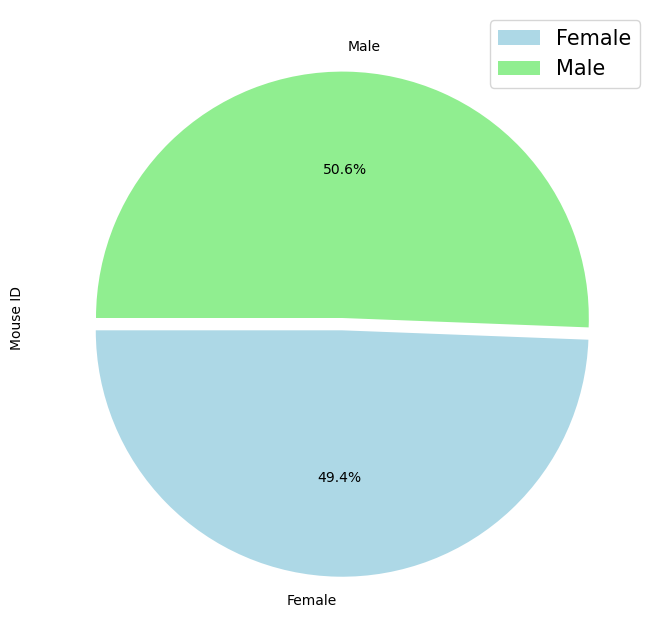

In [266]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colours = ['lightblue', 'lightgreen']
explode = (0.05, 0)
panPie_plot = gender_distribution.plot.pie(y='Total Count',figsize=(8,8), colors = colours, startangle=180, explode = explode, autopct="%1.1f%%")
panPie_plot.legend(["Female", "Male"], prop={'size': 15})

Text(0.5, 1.0, 'Makeup of Female and Male Mice')

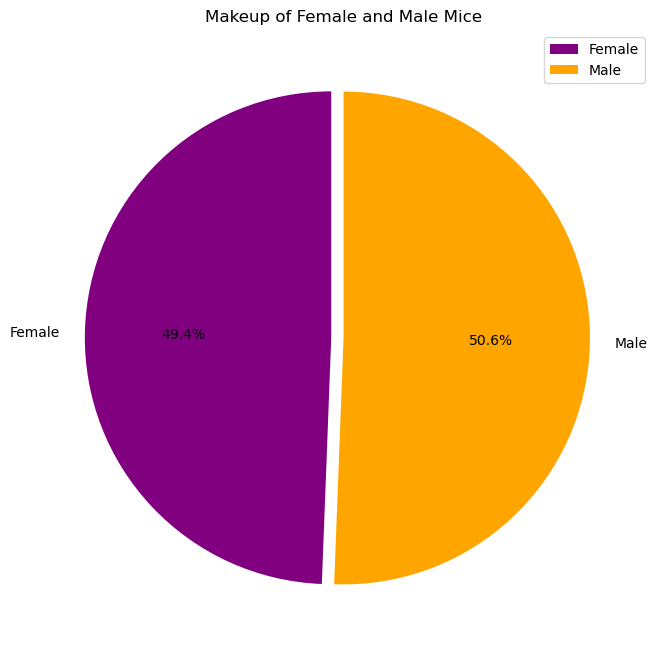

In [277]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colours = ['purple', 'orange']
explode = (0.05, 0)
plt.pie(gender_distribution, explode=explode, labels=gender_distribution.index.values, colors=colours, autopct="%1.1f%%", startangle=90)
plt.legend(["Female", "Male"], prop={'size': 10})
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Makeup of Female and Male Mice')


## Quartiles, Outliers and Boxplots

In [268]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_timepoint = merged_data[merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mice_timepoint = mice_timepoint.sort_values(["Timepoint"], ascending=True)
mice_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
both_dataframe = mice_timepoint.merge(merged_data, on = ('Mouse ID', 'Timepoint'), how = 'left' )
both_dataframe

# Tumor volume at last timepoint
drug_regimes_data = mice_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
drug_regimes_data


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
221,Ceftamin,q483,0,45.000000
220,Ceftamin,o287,0,45.000000
219,Ceftamin,b487,0,45.000000
218,Ceftamin,p438,0,45.000000
...,...,...,...,...
1802,Infubinol,e476,45,62.435404
1804,Infubinol,a203,45,67.973419
1806,Infubinol,f345,45,60.918767
1810,Ceftamin,l471,45,67.748662


In [269]:
drug_regimes_data.shape

(814, 4)

In [270]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
ramicane_data = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", :]
infubinol_data = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol", :]
ceftamin_data = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", :]
capomulin_data

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [271]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

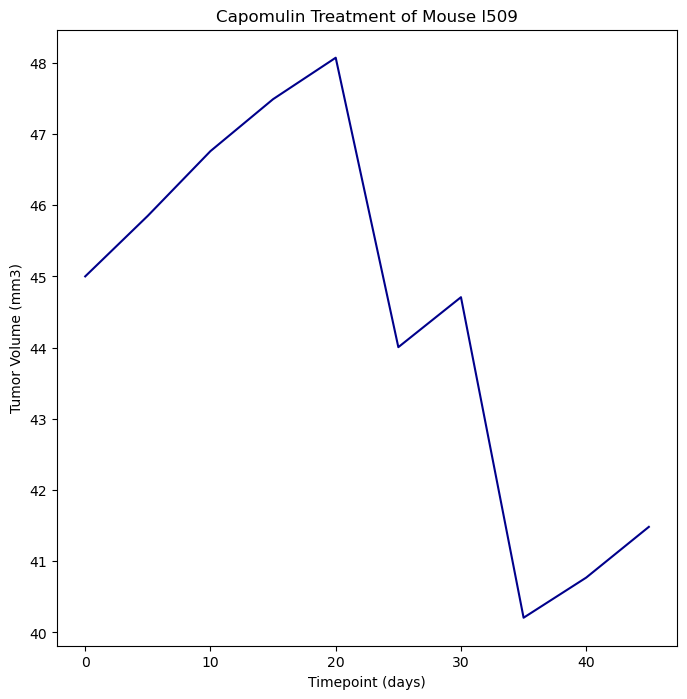

In [272]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = merged_data.loc[(merged_data["Mouse ID"] == "l509")]
line_plot = line_plot.set_index("Timepoint")
line_plot

line_plot["Tumor Volume (mm3)"].plot(color = "darkblue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


C:\Users\Roberto\AppData\Local\Temp\ipykernel_30396\1114867948.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()


Text(0.5, 1.0, 'Weight Against Average Tumor Volume for Capomulin')

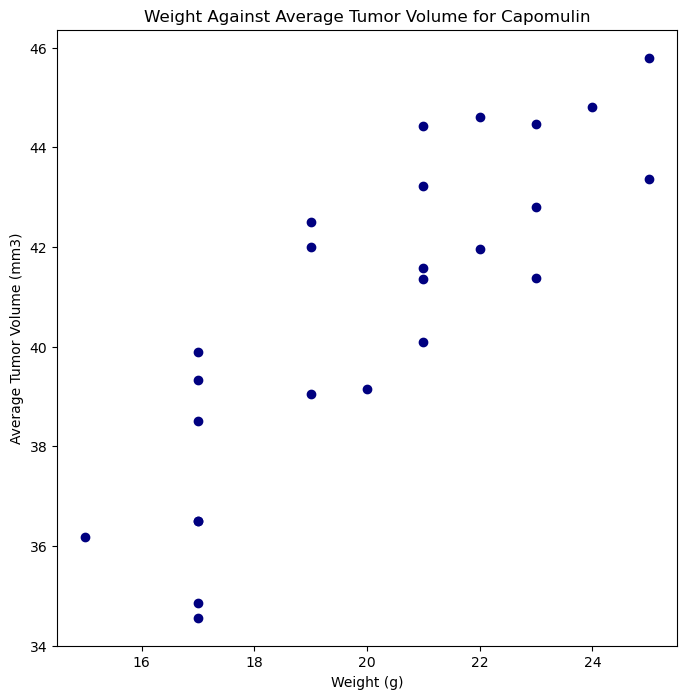

In [273]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
scatter_plot_df

# set x and y value
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "navy")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Against Average Tumor Volume for Capomulin")


## Correlation and Regression

In [274]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f' The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_scatter_plot, volume_scatter_plot)[0],2)}') 


 The correlation coefficient between weight and tumor volume is 0.84


In [275]:
# Linear regression model
linear_representation = st.linregress(scatter_plot_df['Weight (g)'], scatter_plot_df['Tumor Volume (mm3)'])
linear_representation

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_30396\2796647528.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

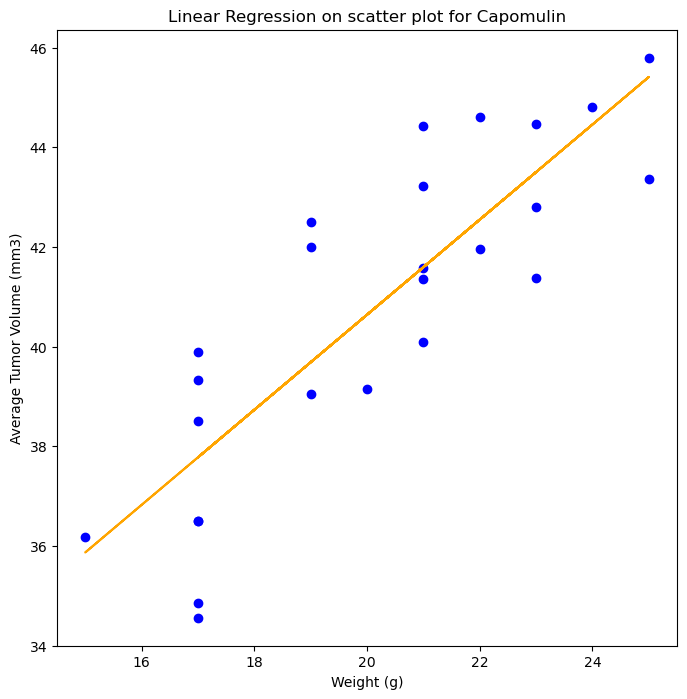

In [276]:
#Caluclate the linear regression model

slope, intercept, r_value , p_value, std_err = st.linregress(weight_scatter_plot, volume_scatter_plot)
y_value = slope * weight_scatter_plot + intercept

#using prior computing data to plot the regression line on the scatter plot
scatter_plot = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin")]
scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "blue")
plt.plot(weight_scatter_plot, y_value, color = "orange")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression on scatter plot for Capomulin")
plt.show